In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Load waveform data, make run data dictionary

In [2]:
# load data for a run and place into dictionary
"""
files = ['adc_data_run_23855_srcid_1_ch_0_0000.npy', \
        'adc_data_run_23855_srcid_2_ch_10_0000.npy', \
        'adc_data_run_23855_srcid_2_ch_17_0000.npy', \
        'adc_data_run_23855_srcid_3_ch_20_0000.npy', \
        'adc_data_run_23855_srcid_3_ch_27_0000.npy', \
        'adc_data_run_23855_srcid_3_ch_30_0000.npy', \
         'adc_data_run_23855_srcid_3_ch_37_0000.npy']
"""
"""
files = ['adc_data_run_23851_srcid_1_ch_7_0000.npy', \
        'adc_data_run_23851_srcid_2_ch_10_0000.npy', \
        'adc_data_run_23851_srcid_2_ch_17_0000.npy', \
        'adc_data_run_23851_srcid_3_ch_20_0000.npy', \
        'adc_data_run_23851_srcid_3_ch_27_0000.npy', \
        'adc_data_run_23851_srcid_3_ch_30_0000.npy', \
         'adc_data_run_23851_srcid_3_ch_37_0000.npy']
"""
files = ['adc_data_run_23857_srcid_1_ch_0_0000.npy', \
        'adc_data_run_23857_srcid_1_ch_7_0000.npy', \
        'adc_data_run_23857_srcid_2_ch_10_0000.npy', \
        'adc_data_run_23857_srcid_2_ch_17_0000.npy', \
        'adc_data_run_23857_srcid_3_ch_20_0000.npy', \
        'adc_data_run_23857_srcid_3_ch_27_0000.npy', \
         'adc_data_run_23857_srcid_3_ch_30_0000.npy', \
        'adc_data_run_23857_srcid_3_ch_37_0000.npy']

#files = ['adc_data_run_23856_srcid_1_ch_0_0000.npy', \
#        'adc_data_run_23856_srcid_1_ch_7_0000.npy']
runnumber = int(files[0].split('run_')[1].split('_srcid')[0])
data_dict = {}
for filename in files:
    f = np.load(filename)
    ch = filename.split('ch_')[1].split('_')[0]
    data_dict[int(ch)] = f
    
runnum_LED_dict = {
23850: 6.2,
23851: 4.8,
23852: 5.4,
23853: 5.5,
23854: 12, 
23855: 6.2,
23856: 5.8,
23857: 4.8,
23858: 5.4,
23859: 5.5,
23860: 12}

# make channel map dictionary
#0-7 c1 10-17 c2 20-27 c3 30 37 c4
keys = [range(0,8), range(10,18), range(20, 28),[30,37]]
values = ['c1', 'c2', 'c3', 'c4']
Dch_module_dict = {}
for i, key in enumerate(keys):
    value = values[i]
    for k in key:
        Dch_module_dict[k] = value

### Plot waveforms from one LED flash in each channel in files

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook
plt.figure()
eventID = 11
window_size = 5 # rolling average window size
pedestal_range = (0, 100) # range of data points to use for calculating pedestal/baseline
for ch in data_dict.keys():
    wvfm = data_dict[ch][eventID, :]
    time_ticks = np.arange(0, len(wvfm), 1)*16
    df = pd.DataFrame({'wvfm': wvfm})
    
    # Apply rolling average
    wvfm_smoothed = df['wvfm'].rolling(window=window_size).mean()
    
    # Subtract pedestal
    wvfm_smoothed = wvfm_smoothed - np.mean(wvfm_smoothed[pedestal_range[0]:pedestal_range[1]])
    
    # plot waveform
    plt.plot(time_ticks, wvfm_smoothed, label=f'Channel {ch}, Module {Dch_module_dict[ch]}')
    
plt.title(f'LED Data VD Coldbox Test \n (Run No: {runnumber}, LED Voltage = {runnum_LED_dict[runnumber]}V)')
plt.xlabel(r'Time [ns]')
#plt.xlim(0, 12)

plt.legend()


### Smooth waveforms with a rolling average

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

window_size = 5
pedestal_range = (0, 100)
keys = list(data_dict.keys())
print(f'keys: {keys}')
key_index = 3
ch = keys[key_index]

# make array to store smoothed waveforms
wvfm_corr = np.zeros((data_dict[ch].shape[0], data_dict[ch].shape[1]))
eventIDs_keep_mask = np.zeros(data_dict[ch].shape[0], dtype=bool)
for eventID in tqdm(range(data_dict[ch].shape[0])):
    wvfm = data_dict[ch][eventID, :]
    df = pd.DataFrame({'wvfm': wvfm})
    
    # Apply rolling average
    wvfm_smoothed = df['wvfm'].rolling(window=window_size).mean()
    
    # Subtract pedestal
    mean = np.mean(wvfm_smoothed[pedestal_range[0]:pedestal_range[1]])
    wvfm_smoothed = wvfm_smoothed - mean
    wvfm_corr[eventID, :] = wvfm_smoothed
    
    if np.any(np.abs(wvfm_smoothed[pedestal_range[0]:pedestal_range[1]]) > 1e9):
        eventIDs_keep_mask[eventID] = True

### optionally cut waveforms that have a messed up pedestal calculation, like due to cosmics
#eventIDs_keep_mask = ~eventIDs_keep_mask
#wvfm_corr = wvfm_corr[eventIDs_keep_mask]


keys: [0, 7, 10, 17, 20, 27, 30, 37]


100%|███████████████████████████████████| 16283/16283 [00:14<00:00, 1117.09it/s]


### Make persistence plot of waveforms. 
Use this plot to identify the level of a single p.e. waveform, and set the corresponding threshold in the next cell to be a little below the single p.e. amplitude.

<IPython.core.display.Javascript object>


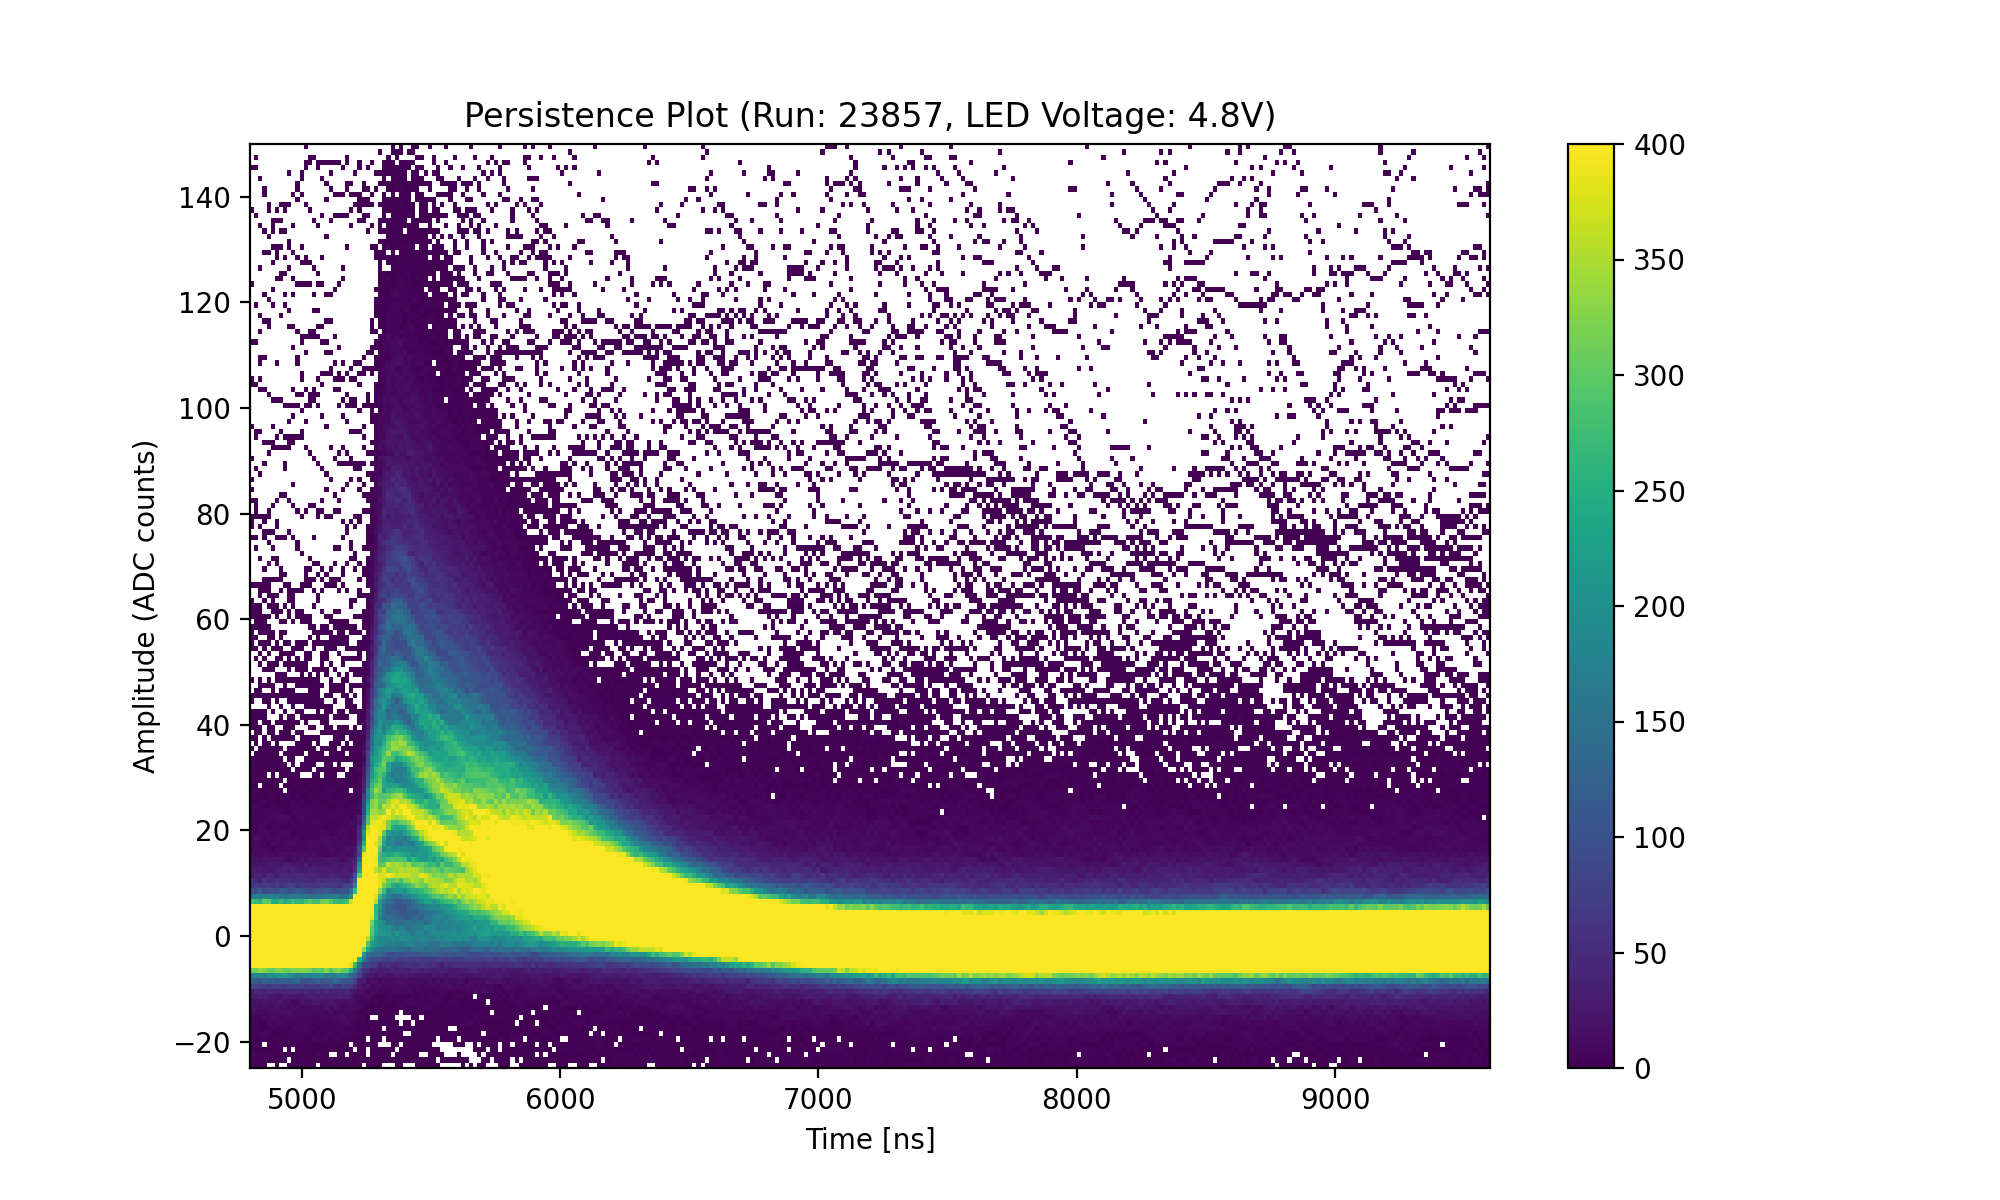

In [5]:
%matplotlib notebook

num_waveforms, num_time_steps = wvfm_corr.shape
flattened_waveforms = wvfm_corr.ravel()

plt.figure(figsize=(10, 6))

# Adjust the number of bins and range
ymax = 150
ymin = -25
num_bins_x = num_time_steps
num_bins_y = ymax - ymin
range_x = [0, num_time_steps*16]
range_y = [ymin, ymax]

plt.hist2d(
    np.tile(np.arange(num_time_steps)*16, num_waveforms),
    flattened_waveforms,
    bins=[num_bins_x, num_bins_y],
    range=[range_x, range_y],
    cmap='viridis',
    cmin=1,
)

plt.xlabel(r'Time [ns]')
plt.ylabel('Amplitude (ADC counts)')
plt.title(f'Persistence Plot (Run: {runnumber}, LED Voltage: {runnum_LED_dict[runnumber]}V)')
cbar = plt.colorbar()

vmin=0
vmax=400 # may need to adjust to better emphasize N p.e. waveform lines
plt.clim(vmin=vmin, vmax=vmax)
#plt.ylim(0, ymax)
plt.xlim(300*16, 600*16)
plt.show()


### Plot spe spectrum, calculate SNR

100%|██████████████████████████████████| 16283/16283 [00:00<00:00, 46354.54it/s]


<IPython.core.display.Javascript object>


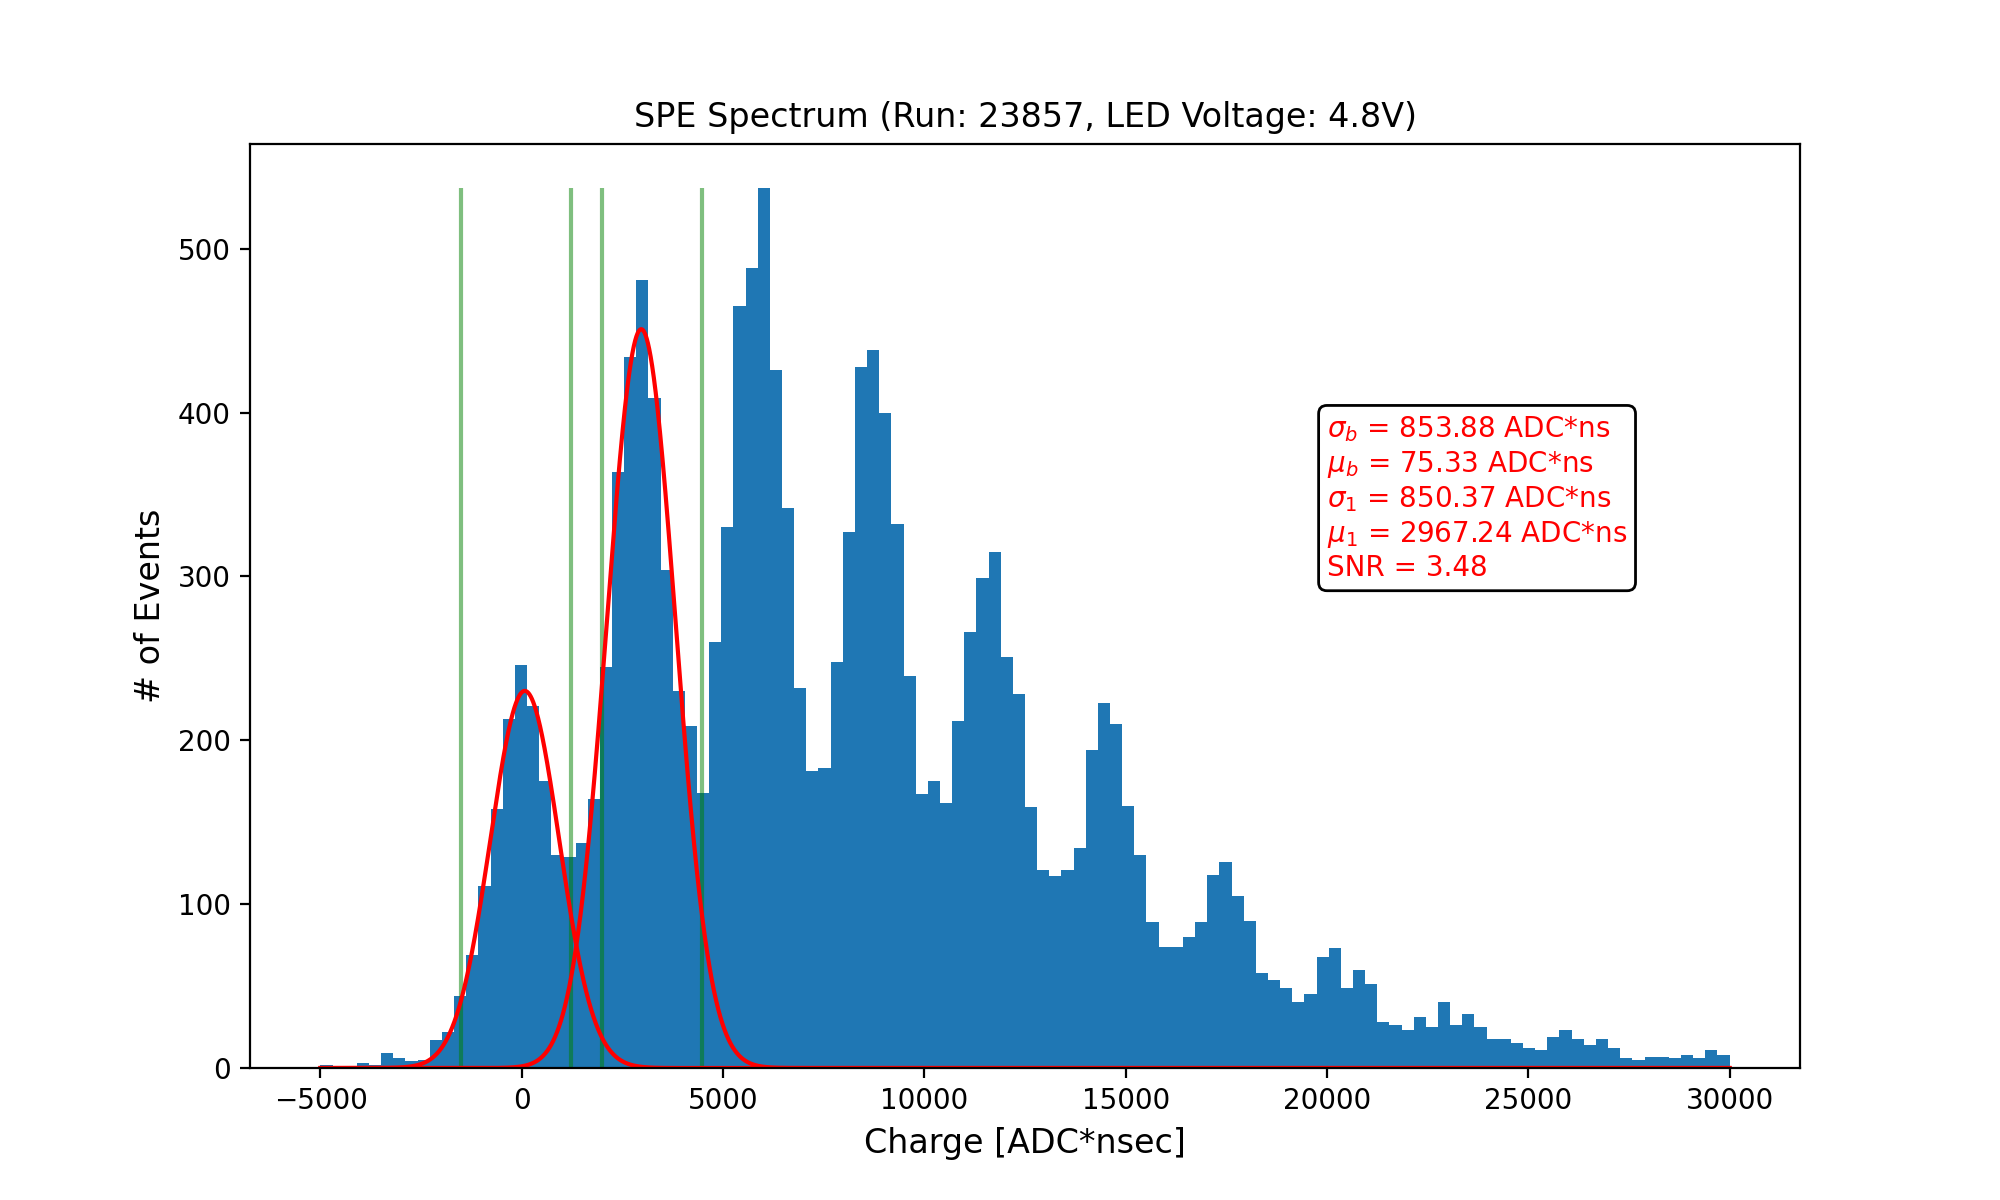

Text(0.5, 1.0, 'SPE Spectrum (Run: 23857, LED Voltage: 4.8V)')

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from scipy.optimize import curve_fit

# set these based on single pe waveforms seen in persistence plot
adc_threshold = 8
integral_range = [5300, 5600]

# calculate integrals of waveforms surpassing single p.e. threshold determined from the persistence plot
sample_interval = 16 # ns
integrals = []
for eventID in tqdm(range(wvfm_corr.shape[0])):
    wvfm = wvfm_corr[eventID, :]
    time_ticks = np.arange(0, len(wvfm), 1)*sample_interval
    
    wvfm_chunk = wvfm[(time_ticks > integral_range[0]) & (time_ticks < integral_range[1])]
    integrals.append(np.trapz(wvfm_chunk, dx=sample_interval))
    
%matplotlib notebook

# plot spe spectrum
hist_range=(-5000, 30000)
nbins = int((hist_range[1] - hist_range[0])/(integral_range[1] - integral_range[0])) 
plt.figure(figsize=(10, 6))
hist = plt.hist(integrals, bins=nbins, range=hist_range);
hist_bins, hist_bincenters = hist[0], hist[1][:-1]
hist_bincenters = hist_bincenters + (hist_bincenters[1] - hist_bincenters[0])/2

do_gaussian_fit = True
if do_gaussian_fit:
    start_0peak, end_0peak = -1500, 1.22e3
    start_1peak, end_1peak = 2000, 4.47e3
    
    plot_vlines = True
    if plot_vlines:
        # plot vertical lines for fit bounds
        plt.vlines(start_1peak, ymin=0, ymax=np.max(hist_bins), color='g', alpha=0.5)
        plt.vlines(end_1peak, ymin=0, ymax=np.max(hist_bins), color='g', alpha=0.5)
        plt.vlines(start_0peak, ymin=0, ymax=np.max(hist_bins), color='g', alpha=0.5)
        plt.vlines(end_0peak, ymin=0, ymax=np.max(hist_bins), color='g', alpha=0.5)
    # need to adjust ranges for the fit to work. Select area around each corresponding peak.
    def gaussian(x, amplitude, mean, stddev):
        return amplitude * np.exp(-(x - mean)**2 / (2 * stddev**2))
    initial_guess_0peak = [200, 0.0, 500]  # Initial guess for amplitude, mean, and stddev
    mask_0peak = (hist_bincenters > start_0peak) & (hist_bincenters < end_0peak)
    params_0peak, covariance = curve_fit(gaussian, hist_bincenters[mask_0peak], hist_bins[mask_0peak], p0=initial_guess_0peak)

    amplitude_fit_0peak, mean_fit_0peak, stddev_fit_0peak = params_0peak
    
    x_values = np.arange(hist_range[0], hist_range[1], 1)
    #x_values = hist_bincenters
    plt.plot(x_values, gaussian(x_values, *params_0peak), 'r-')

    initial_guess_1peak = [400, 3500, 500]  # Initial guess for amplitude, mean, and stddev
    mask_1peak = (hist_bincenters > start_1peak) & (hist_bincenters < end_1peak)
    params_1peak, covariance = curve_fit(gaussian, hist_bincenters[mask_1peak], hist_bins[mask_1peak], p0=initial_guess_1peak)
    amplitude_fit_1peak, mean_fit_1peak, stddev_fit_1peak = params_1peak
    plt.plot(x_values, gaussian(x_values, *params_1peak), 'r-')
    SNR = mean_fit_1peak/stddev_fit_0peak
    
    plt.annotate(r'$\sigma_b$ = '+ f'{stddev_fit_0peak:.2f} ADC*ns\n' \
                 + r'$\mu_b$ = ' + f'{mean_fit_0peak:.2f} ADC*ns\n' \
                 r'$\sigma_1$ = '+ f'{stddev_fit_1peak:.2f} ADC*ns\n' \
                 + r'$\mu_1$ = ' + f'{mean_fit_1peak:.2f} ADC*ns\n' \
                 + 'SNR = ' + f'{SNR:.2f}', xy=(hist_range[1]-10000, 300),fontsize=10, color='red',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))
    

plt.xlabel('Charge [ADC*nsec]', fontsize=12)
plt.ylabel('# of Events', fontsize=12)
plt.title(f'SPE Spectrum (Run: {runnumber}, LED Voltage: {runnum_LED_dict[runnumber]}V)')

PDS runs taken at 50 Hz rate (synced with 50 KHz LED flash rate), 100 us per waveform.
Run number -- LED voltage
23850 -- 6.2 V
23851 -- 4.8 V
23852 -- 5.4 V
23853 -- 5.5 V
23854 -- 12 V
Then PDS runs taken at 50 Hz, synced with a 50 Hz LED flash rate, 16 us per waveform
Run number -- LED voltage
23855 -- 6.2 V
23856 -- 5.8 V
23857 -- 4.8 V
23858 -- 5.4 V
23859 -- 5.5 V
23860 -- 12 V